In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv("C:\\Users\\Sarthak Tyagi\\Downloads\\car data.csv")

In [4]:
data.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
car_data_cleaned = data.drop('Car_Name', axis='columns')

In [7]:
car_data_cleaned['Car_Age'] = 2024 - car_data_cleaned['Year']
car_data_cleaned = car_data_cleaned.drop('Year', axis=1)

In [8]:
car_data_cleaned

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,10
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,Diesel,Dealer,Manual,0,8
297,4.00,5.90,60000,Petrol,Dealer,Manual,0,9
298,3.35,11.00,87934,Petrol,Dealer,Manual,0,15
299,11.50,12.50,9000,Diesel,Dealer,Manual,0,7


In [9]:
car_final = pd.get_dummies(car_data_cleaned, drop_first=True)

In [11]:
X = car_final.drop('Selling_Price', axis='columns')
y = car_final['Selling_Price']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [13]:
model = LinearRegression()

In [14]:
model.fit(X_train, y_train)

LinearRegression()

In [15]:
y_predicted = model.predict(X_test)

In [18]:
r2_score = model.score(X_test, y_test)
print("R^2 Score:", r2_score)

R^2 Score: 0.8208058160445105


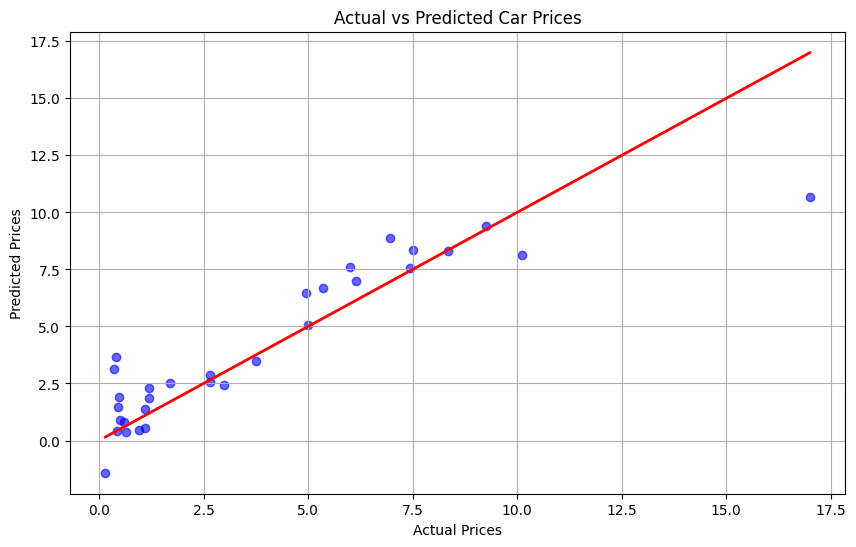

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_predicted, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2) 
plt.title('Actual vs Predicted Car Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()